In [3]:
import os
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import regionmask
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm
from cmcrameri import cm as ccm

/home/yuhaoliu/opt/miniconda3/envs/ncsn/lib/python3.10/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [8]:
dir_path = '/scratch/qdai/data/rainfall_plots_LiT/storm_bill_new_full_size/'
fname = 'precip_output.nc'

In [9]:
sample = xr.open_dataarray(os.path.join(dir_path, fname), engine='netcdf4')
sample

<xarray.DataArray 'precip_output' (lat: 2500, lon: 6000)>
[15000000 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 49.99 49.98 49.97 49.96 ... 25.03 25.02 25.01 25.0
  * lon      (lon) float64 235.0 235.0 235.0 235.0 ... 295.0 295.0 295.0 295.0

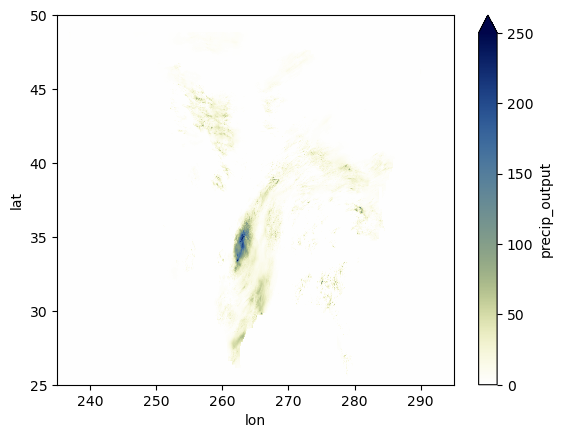

In [91]:
xr.plot.imshow(sample, vmax=250)

In [32]:
land = regionmask.defined_regions.natural_earth_v5_0_0.land_110

# 3. Compute the mask for your precip grid:
#    This returns an integer mask (1=land, 0=ocean, NaN outside any region)
mask = land.mask(sample)

# 4. Keep only land points:
precip_land_only = sample.where(mask == 0)

# 5. (Optional) Drop any rows/columns that are all-NaN:
precip_land_only = precip_land_only.dropna(dim='lat', how='all') \
                                   .dropna(dim='lon', how='all')

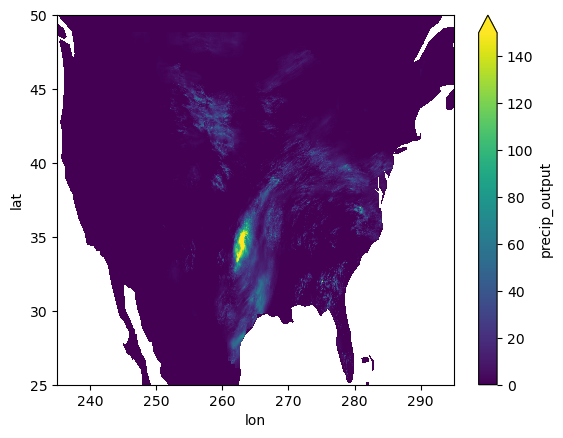

In [36]:
precip_land_only.plot(vmax=150)

In [51]:
cmap_ = cm.get_cmap('viridis')
cmap_.set_bad('white')

/tmp/ipykernel_1884321/3934910999.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_ = cm.get_cmap('viridis')


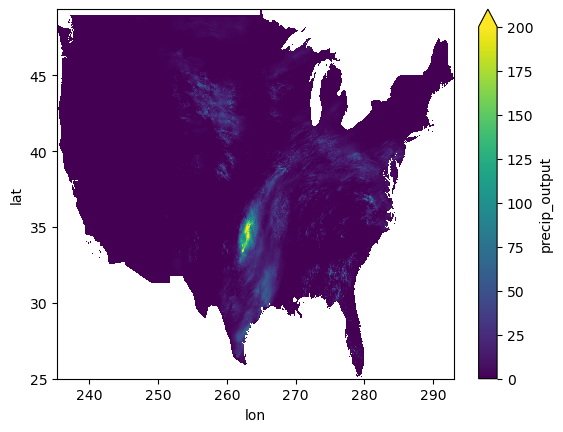

In [52]:
states = regionmask.defined_regions.natural_earth_v5_0_0.us_states_50
conus = states[[n for n in states.names if n not in ("Alaska","Hawaii","Puerto Rico")]]
mask_conus = conus.mask(sample)  # ints 0…47 over CONUS, NaN elsewhere
precip_conus = sample.where(mask_conus.notnull())  # sets ocean & outside to NaN
precip_conus = precip_conus.dropna(dim="lat", how="all").dropna(dim="lon", how="all")
precip_conus.plot(vmax=200)

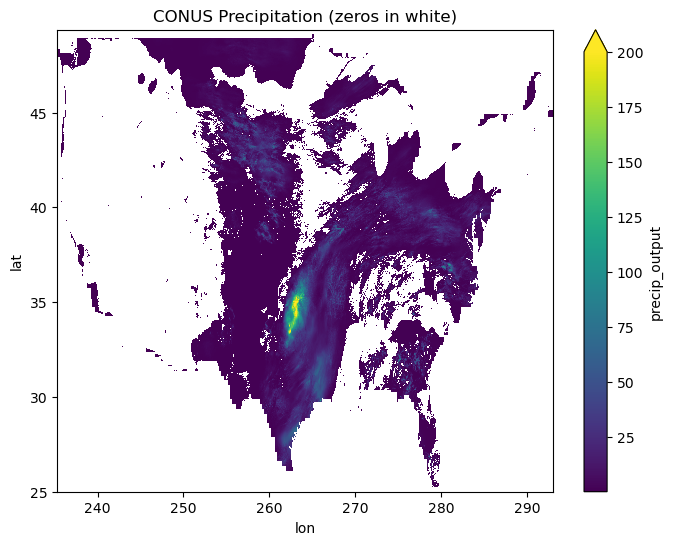

In [53]:
states       = regionmask.defined_regions.natural_earth_v5_0_0.us_states_50
conus        = states[[n for n in states.names if n not in ("Alaska","Hawaii","Puerto Rico")]]
mask_conus   = conus.mask(sample)                          # ints 0…47 over CONUS, NaN elsewhere
precip_conus = sample.where(mask_conus.notnull())          # sets ocean & outside to NaN
precip_conus = precip_conus.dropna(dim="lat", how="all")   \
                             .dropna(dim="lon", how="all")
# --------------------------------------------------------------------------------
# 2. Mask zeros → NaN so they can be drawn “bad” (white)
# --------------------------------------------------------------------------------
precip_nonzero = precip_conus.where(precip_conus != 0)

# --------------------------------------------------------------------------------
# 3. Copy viridis and tell it to draw NaNs in white
# --------------------------------------------------------------------------------
cmap = plt.cm.viridis.copy()
cmap.set_bad('white')

# --------------------------------------------------------------------------------
# 4. Plot with the modified colormap
# --------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8,6))
im = precip_nonzero.plot.imshow(
    ax=ax,
    cmap=cmap,
    vmax=200,
    add_colorbar=True
)
ax.set_title("CONUS Precipitation (zeros in white)")
plt.show()

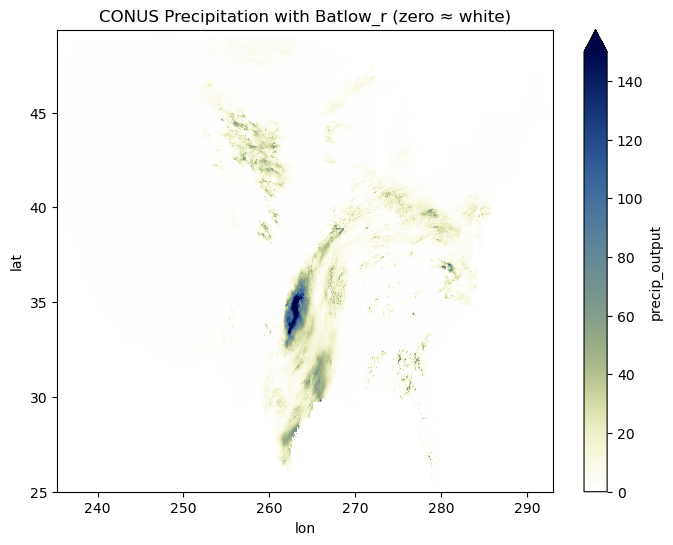

In [90]:
# (Re)build your CONUS‐only DataArray precip_conus as before
states       = regionmask.defined_regions.natural_earth_v5_0_0.us_states_50
conus        = states[[n for n in states.names if n not in ("Alaska","Hawaii","Puerto Rico")]]
mask_conus   = conus.mask(sample)
precip_conus = sample.where(mask_conus.notnull()) \
                     .dropna(dim="lat", how="all") \
                     .dropna(dim="lon", how="all")
fig, ax = plt.subplots(figsize=(8,6))
im = precip_conus.plot.imshow(
    ax=ax,
    cmap=ccm.turku_r,
    vmax=150,
    add_colorbar=True
)
ax.set_title("CONUS Precipitation with Batlow_r (zero ≈ white)")
plt.show()

In [81]:

# List all colormap names
all_maps = [name for name in dir(ccm) if not name.startswith('_')]

# Extract categorical maps (those ending with 'S')
categorical_maps = [name for name in all_maps if name.endswith('S')]

print("Categorical cmcrameri maps:", categorical_maps)

Categorical cmcrameri maps: ['actonS', 'bamakoS', 'batlowKS', 'batlowS', 'batlowWS', 'bilbaoS', 'budaS', 'davosS', 'devonS', 'glasgowS', 'grayCS', 'hawaiiS', 'imolaS', 'lajollaS', 'lapazS', 'lipariS', 'naviaS', 'nuukS', 'osloS', 'tokyoS', 'turkuS']


In [83]:
cmap10 = plt.get_cmap('cmc.batlow', 10)

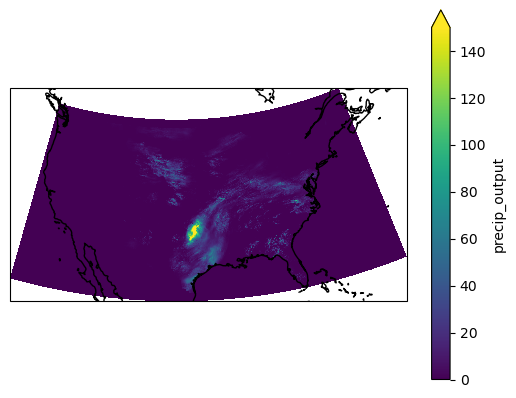

In [103]:
proj = ccrs.LambertConformal(central_longitude=-100)
ax = plt.subplot(111, projection=proj)
sample.plot.pcolormesh(ax=ax,
                       transform=ccrs.PlateCarree(),
                       # cmap=ccm.batlowW_r,
                       vmax=150),

ax.coastlines();

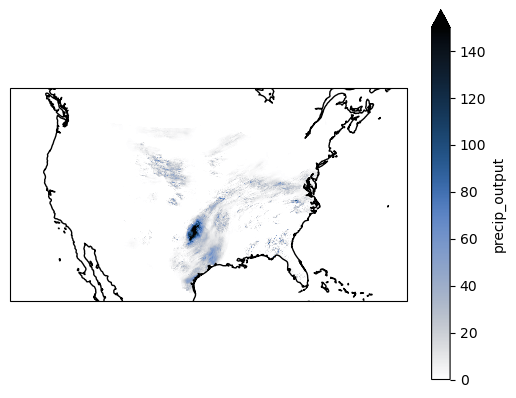

In [111]:
proj = ccrs.LambertConformal(central_longitude=-100)
ax = plt.subplot(111, projection=proj)
sample.plot.pcolormesh(ax=ax,
                       transform=ccrs.PlateCarree(),
                       cmap=ccm.oslo_r,
                       vmax=150),

ax.coastlines();

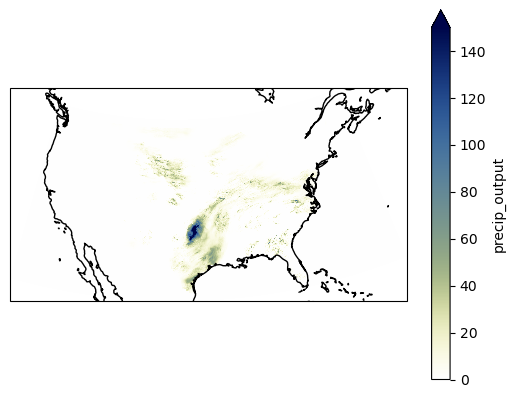

In [112]:
proj = ccrs.LambertConformal(central_longitude=-100)
ax = plt.subplot(111, projection=proj)
sample.plot.pcolormesh(ax=ax,
                       transform=ccrs.PlateCarree(),
                       cmap=ccm.davos_r,
                       vmax=150),

ax.coastlines();

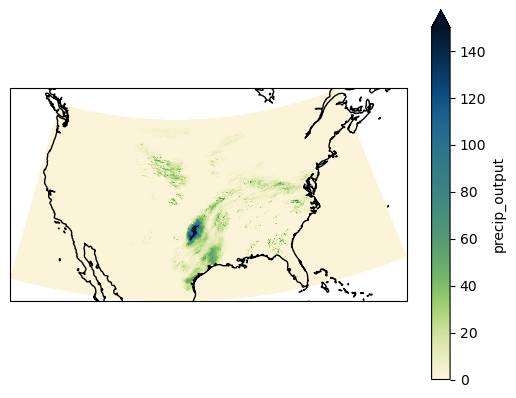

In [113]:
proj = ccrs.LambertConformal(central_longitude=-100)
ax = plt.subplot(111, projection=proj)
sample.plot.pcolormesh(ax=ax,
                       transform=ccrs.PlateCarree(),
                       cmap=ccm.navia_r,
                       vmax=150),

ax.coastlines();

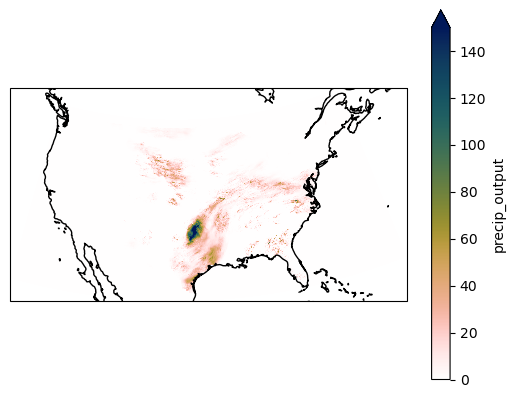

In [114]:
proj = ccrs.LambertConformal(central_longitude=-100)
ax = plt.subplot(111, projection=proj)
sample.plot.pcolormesh(ax=ax,
                       transform=ccrs.PlateCarree(),
                       cmap=ccm.batlowW_r,
                       vmax=150),

ax.coastlines();

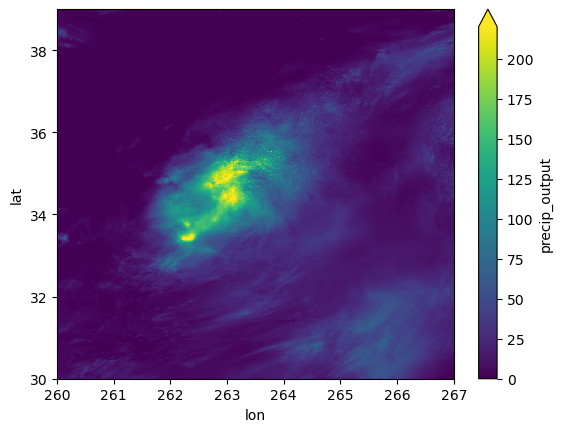

In [133]:
crop = sample.sel(lon=slice(260, 267), lat=slice(39, 30))
crop.plot(vmax=220)

In [129]:
gt = xr.open_dataarray(os.path.join(dir_path, 'precip_gt.nc'), engine='netcdf4')
gt

<xarray.DataArray 'precip_gt' (lat: 2500, lon: 6000)>
[15000000 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 49.99 49.98 49.97 49.96 ... 25.03 25.02 25.01 25.0
  * lon      (lon) float64 235.0 235.0 235.0 235.0 ... 295.0 295.0 295.0 295.0

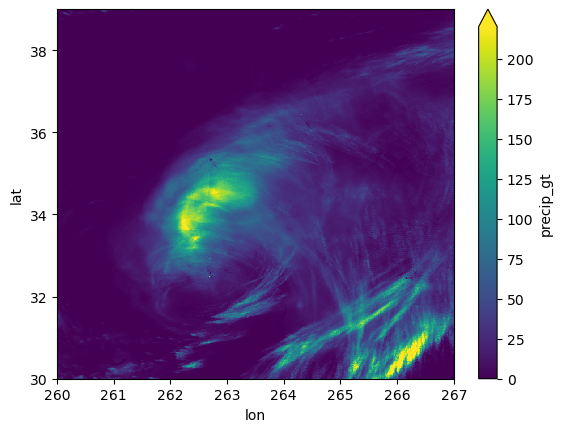

In [134]:
gt_crop = gt.sel(lon=slice(260, 267), lat=slice(39, 30))
gt_crop.plot(vmax=220)

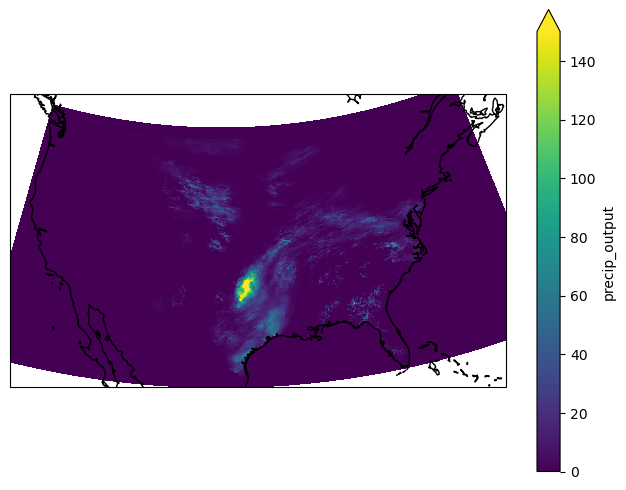

In [147]:
lon_min, lon_max = 238, 290
lat_min, lat_max =  25, 50

# Set up the projection and axes
proj = ccrs.LambertConformal(central_longitude=-100)
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(projection=proj))

# Plot your data
sample.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    vmax=150
)

# Zoom to the region
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

ax.coastlines()
plt.show()

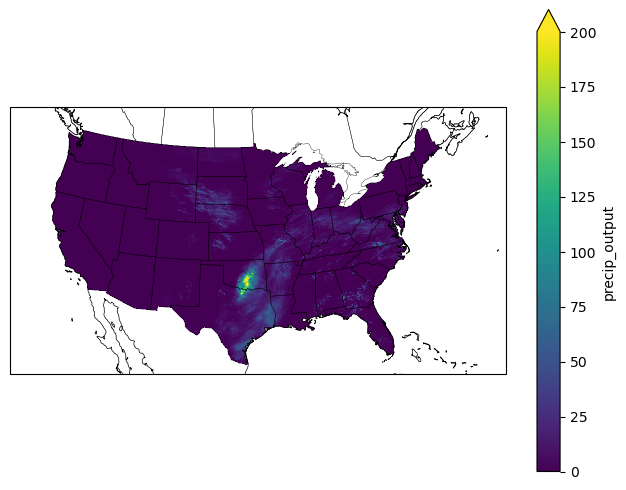

In [166]:
plt.rcParams['svg.fonttype'] = 'none'

proj = ccrs.LambertConformal(central_longitude=-100)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Your data
precip_conus.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    # cmap=ccm.batlowW_r,
    vmax=200,
    rasterized=True,
)

# Coastlines
ax.coastlines(linewidth=0.5)

# Add U.S. state boundaries
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.25)
# plt.show()

plt.savefig(os.path.join(dir_path, f'precip_output_projected.svg'), dpi=300, transparent=True)

## Another sample


In [5]:
dir_path = '/scratch/qdai/data/rainfall_plots_LiT/storm_bill_new_full_size_2/'
fname = 'precip_output.nc'
sample = xr.open_dataarray(os.path.join(dir_path, fname), engine='netcdf4')
sample

<xarray.DataArray 'precip_output' (lat: 2500, lon: 6000)>
[15000000 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 49.99 49.98 49.97 49.96 ... 25.03 25.02 25.01 25.0
  * lon      (lon) float64 235.0 235.0 235.0 235.0 ... 295.0 295.0 295.0 295.0

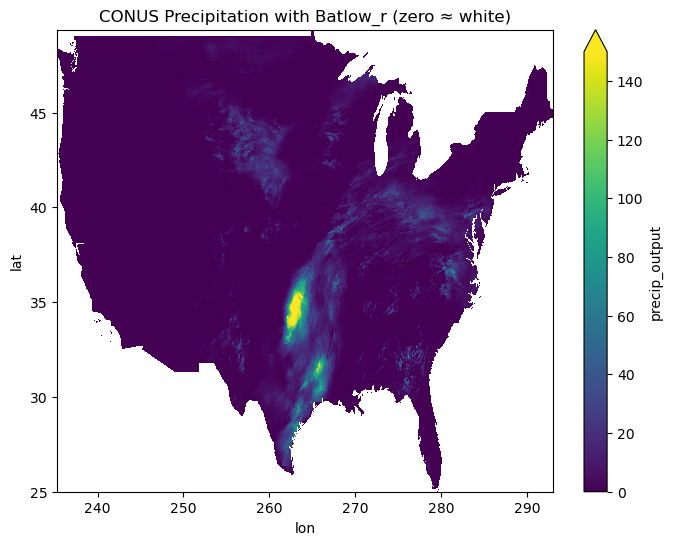

In [7]:
# (Re)build your CONUS‐only DataArray precip_conus as before
states       = regionmask.defined_regions.natural_earth_v5_0_0.us_states_50
conus        = states[[n for n in states.names if n not in ("Alaska","Hawaii","Puerto Rico")]]
mask_conus   = conus.mask(sample)
precip_conus = sample.where(mask_conus.notnull()) \
                     .dropna(dim="lat", how="all") \
                     .dropna(dim="lon", how="all")
fig, ax = plt.subplots(figsize=(8,6))
im = precip_conus.plot.imshow(
    ax=ax,
    # cmap=ccm.turku_r,
    vmax=150,
    add_colorbar=True
)
ax.set_title("CONUS Precipitation with Batlow_r (zero ≈ white)")
plt.show()

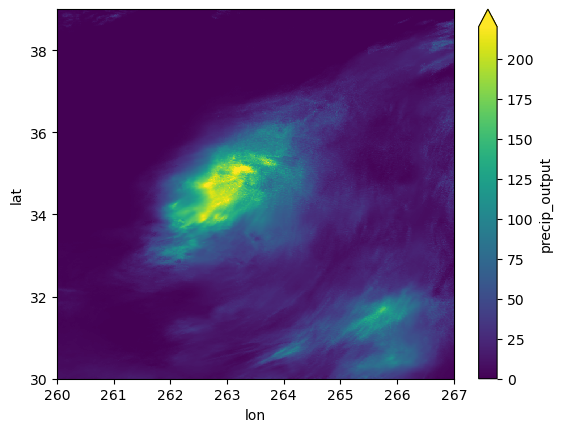

In [8]:
crop = sample.sel(lon=slice(260, 267), lat=slice(39, 30))
crop.plot(vmax=220)

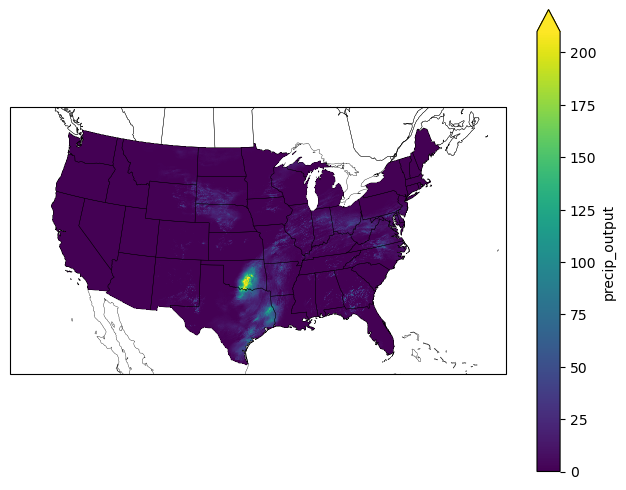

In [14]:
plt.rcParams['svg.fonttype'] = 'none'

proj = ccrs.LambertConformal(central_longitude=-100)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Your data
precip_conus.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    # cmap=ccm.batlowW_r,
    vmax=210,
    rasterized=True,
)

# Coastlines
ax.coastlines(linewidth=0.25)

# Add U.S. state boundaries
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.25)
# plt.show()

plt.savefig(os.path.join(dir_path, f'precip_output_projected.svg'), dpi=300, transparent=True)